In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("madfhantr.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print("Shape:")
print(df.shape)
print("\nColumns:")
print(df.columns)

Shape:
(614, 13)

Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
def info_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Number of unique values
        unique_values=df.nunique()

        # Make a table with the results
        info = pd.concat([mis_val, mis_val_percent,unique_values], axis=1)
        
        # Rename the columns
        info.rename(columns={0 : 'Missing Values', 1 : '% of Missing Values',2:'unique_values'},inplace=True)
        
        #Sort table by num of missing values
        info.sort_values(by=['Missing Values'], ascending=False,inplace=True)

        # Return the info dataframe 
        return info

In [6]:
miss_ctg_col = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in miss_ctg_col:
    mode_val = df[col].value_counts().index[0]
    df[col].fillna(mode_val,inplace=True)

miss_num_col = ['LoanAmount','Loan_Amount_Term']
for col in miss_num_col:
    df[col].fillna(df[col].mean(),inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

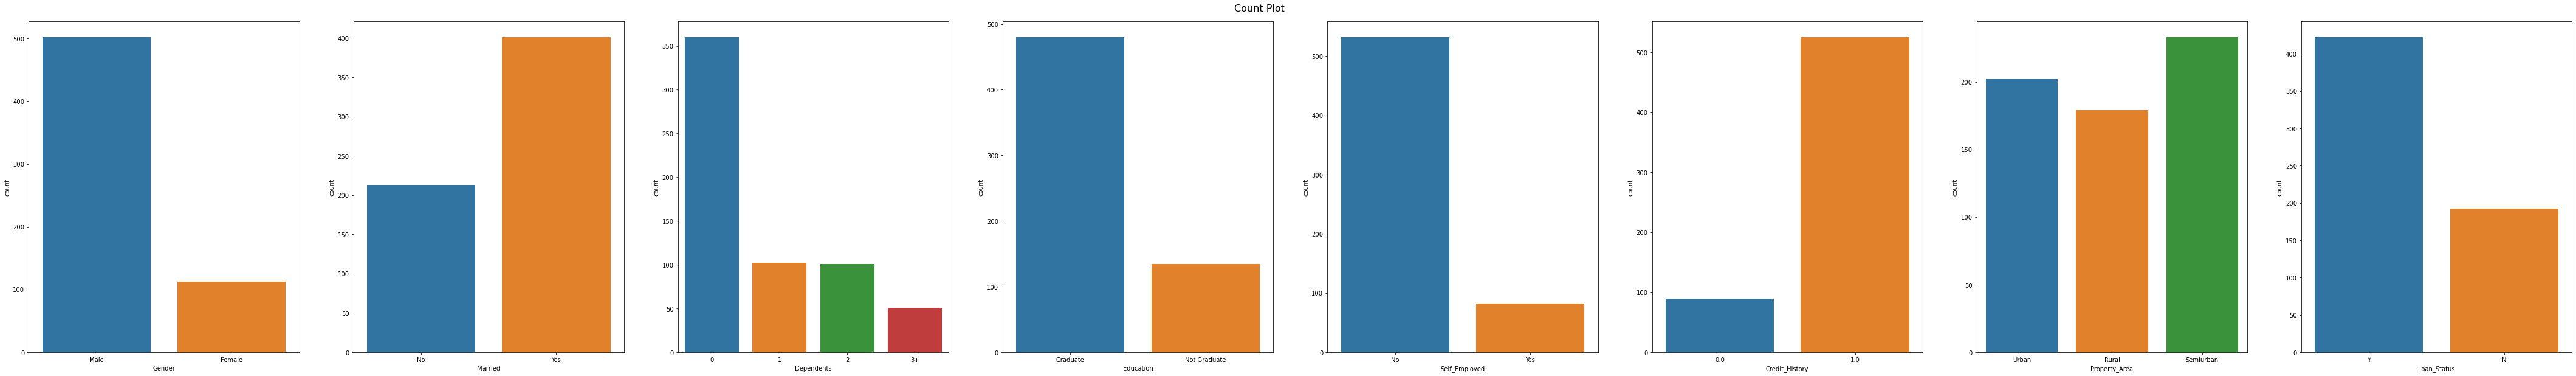

In [7]:
col_list=[col for col in df.columns if(df[col].nunique()<11)]

fig, ax = plt.subplots(1,len(col_list), figsize=(75, 10))
fig.suptitle('Count Plot', fontsize=16, y=0.92)

for i, col in enumerate(col_list):
    if df[col].nunique()<=10:
        graph = sns.countplot(x=df[col], ax=ax[i])

In [8]:
df.replace({
    'Gender':{'Male':1,'Female':0},
    'Married':{'No':0,'Yes':1},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Education':{'Graduate':1,'Not Graduate':0},
    "Loan_Status":{'N':0,'Y':1}
    },
     inplace=True)

df.replace(to_replace='3+', value=3, inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [9]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [10]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [11]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=3)

In [13]:
print('X_train length:',len(X_train),'X_test length:',len(X_test))
print("\nX_train dataset")
X_train

X_train length: 521 X_test length: 93

X_train dataset


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
567,1,1,3,1,0,3400,2500.0,123.000000,360.0,0.0,0
33,1,1,0,1,0,3500,1667.0,114.000000,360.0,1.0,1
88,1,0,0,1,0,8566,0.0,210.000000,360.0,1.0,2
530,1,1,0,1,0,1025,5500.0,216.000000,360.0,1.0,0
95,1,0,0,1,0,6782,0.0,146.412162,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
510,1,0,0,0,0,3598,1287.0,100.000000,360.0,1.0,0
94,1,0,0,0,0,3620,0.0,25.000000,120.0,1.0,1
278,1,1,0,1,0,14583,0.0,436.000000,360.0,1.0,1
425,1,1,0,1,0,2666,4300.0,121.000000,360.0,1.0,0


In [14]:
print('Y_train length:',len(Y_train),'Y_test length:',len(Y_test))
print("\nY_train dataset")
Y_train

Y_train length: 521 Y_test length: 93

Y_train dataset


567    0
33     1
88     1
530    1
95     0
      ..
510    0
94     1
278    1
425    1
252    1
Name: Loan_Status, Length: 521, dtype: int64

In [15]:
X_train.reset_index(drop=True,inplace=True)
Y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

In [16]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,3,1,0,3400,2500.0,123.000000,360.0,0.0,0
1,1,1,0,1,0,3500,1667.0,114.000000,360.0,1.0,1
2,1,0,0,1,0,8566,0.0,210.000000,360.0,1.0,2
3,1,1,0,1,0,1025,5500.0,216.000000,360.0,1.0,0
4,1,0,0,1,0,6782,0.0,146.412162,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
516,1,0,0,0,0,3598,1287.0,100.000000,360.0,1.0,0
517,1,0,0,0,0,3620,0.0,25.000000,120.0,1.0,1
518,1,1,0,1,0,14583,0.0,436.000000,360.0,1.0,1
519,1,1,0,1,0,2666,4300.0,121.000000,360.0,1.0,0


In [17]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,2138,0.0,99.000000,360.0,0.0,1
1,1,1,2,1,0,5935,0.0,133.000000,360.0,1.0,1
2,1,1,0,0,0,3010,3136.0,146.412162,360.0,0.0,2
3,1,1,2,1,0,3159,461.0,108.000000,84.0,1.0,2
4,1,0,0,1,0,2500,20000.0,103.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
88,1,1,0,1,0,4750,2333.0,130.000000,360.0,1.0,2
89,1,1,0,1,0,2058,2134.0,88.000000,360.0,1.0,2
90,0,0,0,1,0,2500,0.0,67.000000,360.0,1.0,2
91,1,1,3,0,0,2647,1587.0,173.000000,360.0,1.0,0


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
print("Coefficients of regression equation:")
print(pd.DataFrame(model.coef_, X.columns, columns = ['Coeff']))
print("\nIntercepts of regression equation:")
print(model.intercept_)

Coefficients of regression equation:
                      Coeff
Gender            -0.006555
Married            0.099460
Dependents         0.000883
Education          0.073045
Self_Employed      0.011631
ApplicantIncome    0.000002
CoapplicantIncome -0.000007
LoanAmount        -0.000370
Loan_Amount_Term  -0.000094
Credit_History     0.691957
Property_Area      0.009012

Intercepts of regression equation:
0.054776675101023575


In [20]:
Y_pred = model.predict(X_test)

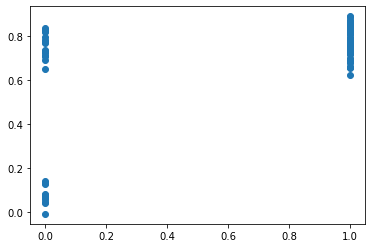

In [21]:
plt.scatter(Y_test, Y_pred)

In [22]:
y=pd.DataFrame()

y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0.070023,0
1,0.850716,1
2,0.062248,0
3,0.887072,1
4,0.623109,1
...,...,...
88,0.841660,1
89,0.853803,1
90,0.783480,1
91,0.738526,0


# LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3)

In [24]:
Y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  0.8172043010752689


In [26]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
88,1,1
89,1,1
90,1,1
91,1,0


In [27]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [28]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8023032629558541


In [29]:
Y_pred = classifier.predict(X_test)

In [30]:
# accuracy score on testing data
testing_data_accuray = accuracy_score(Y_pred,Y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on testing data :  0.8279569892473119


In [31]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
88,1,1
89,1,1
90,1,1
91,1,0


In [32]:
from sklearn.datasets import make_classification
from sklearn import tree

 
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)


[Text(102.84255547602005, 212.49818181818182, 'X[9] <= 0.5\ngini = 0.43\nsamples = 521\nvalue = [163, 358]'),
 Text(35.46914817465999, 202.61454545454546, 'X[7] <= 547.5\ngini = 0.167\nsamples = 76\nvalue = [69, 7]'),
 Text(31.63464566929134, 192.73090909090908, 'X[6] <= 8115.0\ngini = 0.147\nsamples = 75\nvalue = [69, 6]'),
 Text(21.089763779527562, 182.84727272727272, 'X[5] <= 4316.5\ngini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(11.503507516105943, 172.96363636363637, 'X[8] <= 240.0\ngini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(7.669005010737295, 163.07999999999998, 'X[5] <= 2546.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(3.8345025053686475, 153.19636363636363, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.503507516105943, 153.19636363636363, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(15.33801002147459, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(30.67602004294918, 172.96363636363637, 'X[5] <= 4934.0\ngini = 0.231\ns

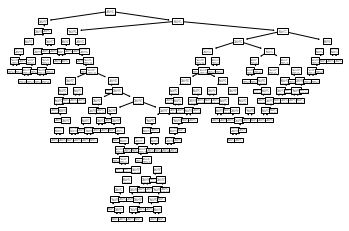

In [33]:
tree.plot_tree(classifier)

In [34]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)
Y_pred= classifier.predict(X_test)
testing_data_accuray = accuracy_score(Y_pred,Y_test)
print('Accuracy on testng data : ', testing_data_accuray)

Accuracy on training data :  1.0
Accuracy on testng data :  0.7419354838709677


In [35]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
88,0,1
89,1,1
90,1,1
91,0,0


# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [37]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)
Y_pred= classifier.predict(X_test)
testing_data_accuray = accuracy_score(Y_pred,Y_test)
print('Accuracy on testng data : ', testing_data_accuray)

Accuracy on training data :  0.7485604606525912
Accuracy on testng data :  0.5698924731182796


In [38]:
y=pd.DataFrame()
y['Y_pred']=pd.DataFrame(Y_pred)
y['Y_test']=pd.DataFrame((Y_test))
y

,Y_pred,Y_test
0,0,0
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
88,0,1
89,1,1
90,1,1
91,1,0
